Regression models for predicting Valence, Arousal and Dominance seperately

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


data_01=pd.read_csv('Emo_Bank_VAD.csv')

print(data_01.columns)
print('')
print(data_01.shape)
print(data_01.head())
print('')
print(data_01.dtypes)

Index(['id', 'split', 'V', 'A', 'D', 'text'], dtype='object')

(9906, 6)
                    id  split     V     A     D  \
0  110CYL068_1036_1079  train  3.00  3.00  3.20   
1  110CYL068_1079_1110   test  2.80  3.10  2.80   
2  110CYL068_1127_1130  train  3.00  3.00  3.00   
3  110CYL068_1137_1188  train  3.44  3.00  3.22   
4  110CYL068_1189_1328  train  3.55  3.27  3.46   

                                                text  
0        Remember what she said in my last letter? "  
1                          If I wasn't working here.  
2                                                .."  
3  Goodwill helps people get off of public assist...  
4  Sherry learned through our Future Works class ...  

id        object
split     object
V        float64
A        float64
D        float64
text      object
dtype: object


In [8]:
#Ridge regression with GridSearchCV for "Arousal"
from sklearn.model_selection import GridSearchCV, train_test_split


# train, validation and test split dataset
x_train, x_test, y_train, y_test = train_test_split(data_01["text"], data_01["A"], test_size = 0.1, shuffle=True, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, shuffle=True, random_state = 1) 
print("Data shapes:", x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)


# Define a pipeline with TfidfVectorizer and Ridge Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('ridge', Ridge())  
])

# Define parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],  
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'ridge__alpha': [0.1, 1.0, 10.0] 
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Make predictions with the best model
y_pred_train_A = grid_search.predict(x_train)
y_pred_val_A = grid_search.predict(x_val)
y_pred_test_A = grid_search.predict(x_test)

# Evaluate the model
print("Arousal")
print("Train RMSE:", round(rmse(y_train, y_pred_train_A), 2))
print("Train MSE:", round(mean_squared_error(y_train, y_pred_train_A), 2))
print("Train MAE:", round(mean_absolute_error(y_train, y_pred_train_A), 2))
print()
print("Validation RMSE:", round(rmse(y_val, y_pred_val_A), 2))
print("Validation MSE:", round(mean_squared_error(y_val, y_pred_val_A), 2))
print("Validation MAE:", round(mean_absolute_error(y_val, y_pred_val_A), 2))
print()
print("Test RMSE:", round(rmse(y_test, y_pred_test_A), 2))
print("Test MSE:", round(mean_squared_error(y_test, y_pred_test_A), 2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test_A), 2))




Data shapes: (8023,) (892,) (991,) (8023,) (892,) (991,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'ridge__alpha': 10.0, 'tfidf__max_features': 7000, 'tfidf__ngram_range': (1, 1)}
Best Score (Negative MSE): -0.06082196384010742
Arousal
Train RMSE: 0.23
Train MSE: 0.05
Train MAE: 0.17

Validation RMSE: 0.25
Validation MSE: 0.06
Validation MAE: 0.19

Test RMSE: 0.26
Test MSE: 0.07
Test MAE: 0.19


In [9]:
# Create DataFrames for comparison
train_comparison = pd.DataFrame({
    'Actual_A': y_train,
    'Predicted_A': y_pred_train_A
})

val_comparison = pd.DataFrame({
    'Actual_A': y_val,
    'Predicted_A': y_pred_val_A
})

test_comparison = pd.DataFrame({
    'Actual_A': y_test,
    'Predicted_A': y_pred_test_A
})

# Round predicted values to two decimal places
train_comparison['Predicted_A'] = train_comparison['Predicted_A'].round(2)
val_comparison['Predicted_A'] = val_comparison['Predicted_A'].round(2)
test_comparison['Predicted_A'] = test_comparison['Predicted_A'].round(2)

# Display the comparison tables
print("\nTraining Set Comparison:")
print(train_comparison.head())  
print("\nValidation Set Comparison:")
print(val_comparison.head())
print("\nTest Set Comparison:")
print(test_comparison.head())

# Save the comparison tables to CSV files
train_comparison.to_csv("train_comparison_ridge2_A.csv", index=False)
val_comparison.to_csv("val_comparison_ridge2_A.csv", index=False)
test_comparison.to_csv("test_comparison_ridge2_A.csv", index=False)


Training Set Comparison:
      Actual_A  Predicted_A
5214      2.70         3.00
4784      3.10         3.01
708       3.10         3.08
6369      3.33         3.05
2135      3.00         3.00

Validation Set Comparison:
      Actual_A  Predicted_A
7794      3.10         3.13
6770      2.90         3.01
3444      3.43         3.07
1767      3.00         3.00
8128      3.20         2.99

Test Set Comparison:
      Actual_A  Predicted_A
8687      2.20         3.06
7972      3.20         3.05
1628      2.86         2.99
8699      2.70         2.98
5648      2.78         3.00


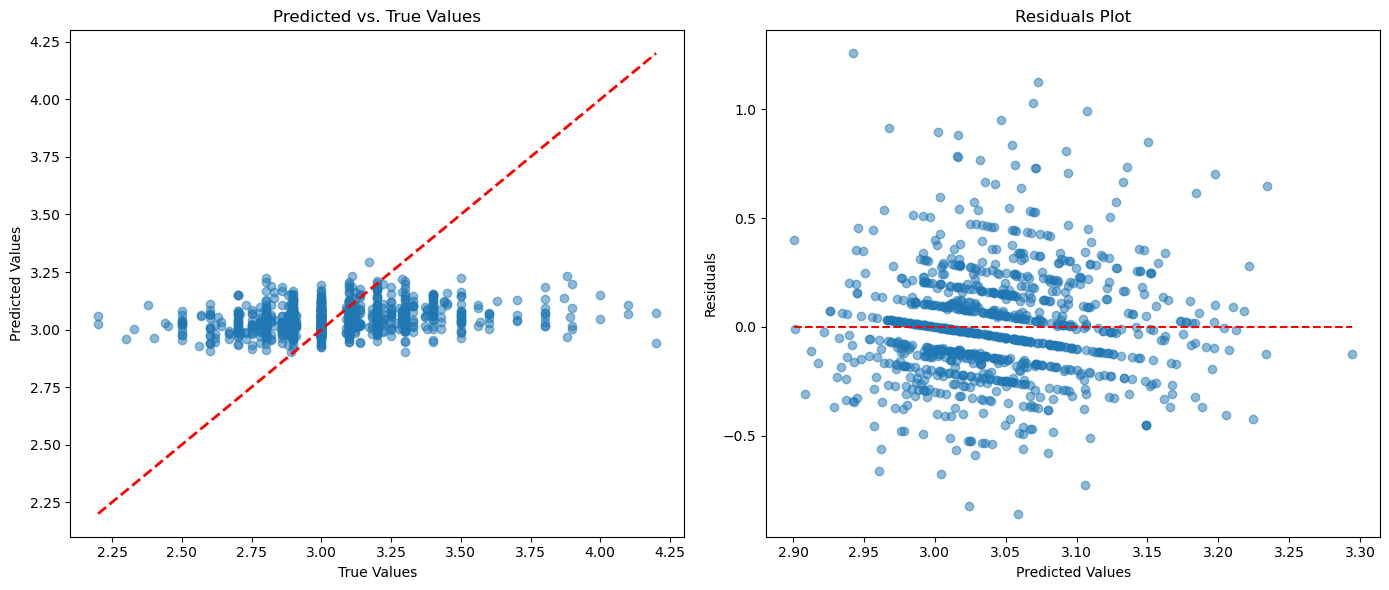

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Predicted vs. Real Values Plot
axs[0].scatter(y_test, y_pred_test_A, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Predicted vs. True Values')

# Residuals Plot
residuals = y_test - y_pred_test_A
axs[1].scatter(y_pred_test_A, residuals, alpha=0.5)
axs[1].hlines(0, xmin=min(y_pred_test_A), xmax=max(y_pred_test_A), colors='r', linestyles='--')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()


In [11]:
#Ridge for "Valance"

#Split the data
x_train, x_test, y_train, y_test = train_test_split(data_01["text"], data_01["V"], test_size=0.1, shuffle=True, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=True, random_state=1)


# Define a pipeline with TfidfVectorizer and Ridge Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('ridge', Ridge())  
])

# Define parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],  
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'ridge__alpha': [0.1, 1.0, 10.0] 
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Make predictions with the best model
y_pred_train_V = grid_search.predict(x_train)
y_pred_val_V = grid_search.predict(x_val)
y_pred_test_V = grid_search.predict(x_test)

# Evaluate the model
print("Valence")
print("Train RMSE:", round(rmse(y_train, y_pred_train_V), 2))
print("Train MSE:", round(mean_squared_error(y_train, y_pred_train_V), 2))
print("Train MAE:", round(mean_absolute_error(y_train, y_pred_train_V), 2))
print()
print("Validation RMSE:", round(rmse(y_val, y_pred_val_V), 2))
print("Validation MSE:", round(mean_squared_error(y_val, y_pred_val_V), 2))
print("Validation MAE:", round(mean_absolute_error(y_val, y_pred_val_V), 2))
print()
print("Test RMSE:", round(rmse(y_test, y_pred_test_V), 2))
print("Test MSE:", round(mean_squared_error(y_test, y_pred_test_V), 2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test_V), 2))



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'ridge__alpha': 1.0, 'tfidf__max_features': 7000, 'tfidf__ngram_range': (1, 1)}
Best Score (Negative MSE): -0.08840226640757014
Valence
Train RMSE: 0.21
Train MSE: 0.04
Train MAE: 0.15

Validation RMSE: 0.3
Validation MSE: 0.09
Validation MAE: 0.22

Test RMSE: 0.3
Test MSE: 0.09
Test MAE: 0.22


In [12]:
# Create DataFrames for comparison
train_comparison = pd.DataFrame({
    'Actual_V': y_train,
    'Predicted_V': y_pred_train_V
})

val_comparison = pd.DataFrame({
    'Actual_V': y_val,
    'Predicted_V': y_pred_val_V
})

test_comparison = pd.DataFrame({
    'Actual_V': y_test,
    'Predicted_V': y_pred_test_V
})

# Round predicted values to two decimal places
train_comparison['Predicted_V'] = train_comparison['Predicted_V'].round(2)
val_comparison['Predicted_V'] = val_comparison['Predicted_V'].round(2)
test_comparison['Predicted_V'] = test_comparison['Predicted_V'].round(2)

# Display the comparison tables
print("\nTraining Set Comparison:")
print(train_comparison.head())  
print("\nValidation Set Comparison:")
print(val_comparison.head())
print("\nTest Set Comparison:")
print(test_comparison.head())

# Save the comparison tables to CSV files
train_comparison.to_csv("train_comparison_ridge_V.csv", index=False)
val_comparison.to_csv("val_comparison_ridge_V.csv", index=False)
test_comparison.to_csv("test_comparison_ridge_V.csv", index=False)


Training Set Comparison:
      Actual_V  Predicted_V
5214      3.00         3.02
4784      2.50         2.70
708       2.30         2.71
6369      3.56         3.47
2135      3.00         3.00

Validation Set Comparison:
      Actual_V  Predicted_V
7794      3.10         3.18
6770      2.90         3.03
3444      3.00         2.50
1767      3.11         2.91
8128      3.00         2.95

Test Set Comparison:
      Actual_V  Predicted_V
8687       2.9         3.05
7972       2.6         2.88
1628       3.0         2.97
8699       2.9         2.85
5648       3.0         3.07


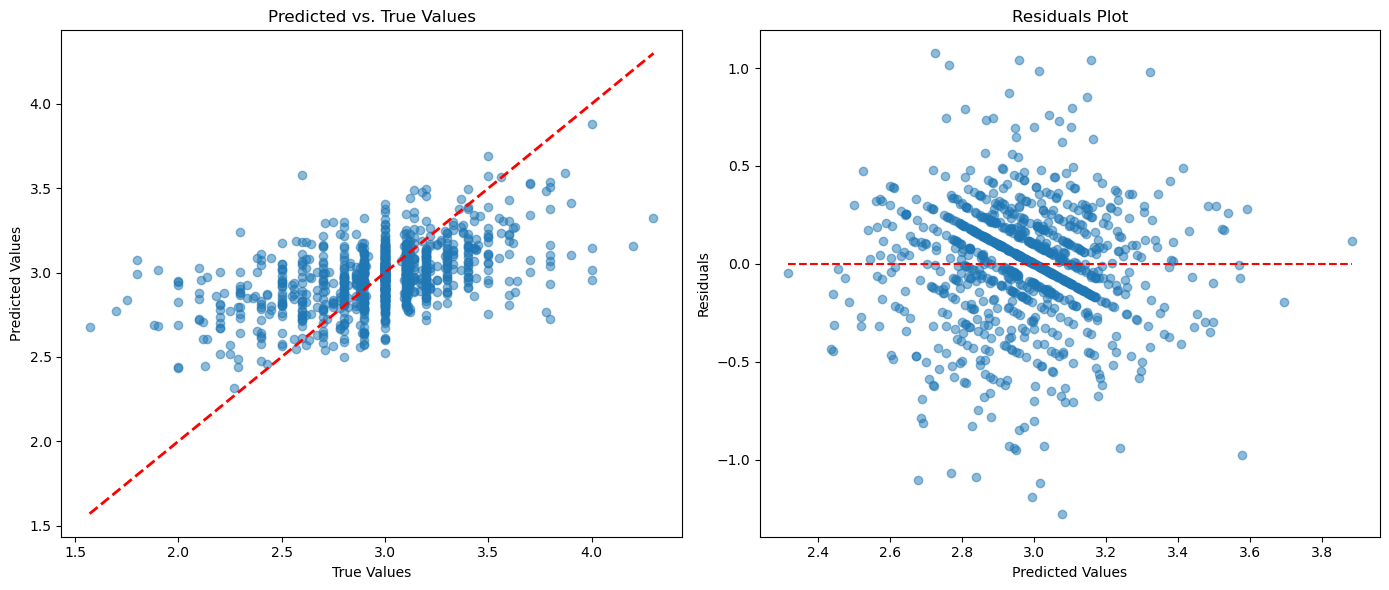

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Predicted vs. Real Values Plot
axs[0].scatter(y_test, y_pred_test_V, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Predicted vs. True Values')

# Residuals Plot
residuals = y_test - y_pred_test_V
axs[1].scatter(y_pred_test_V, residuals, alpha=0.5)
axs[1].hlines(0, xmin=min(y_pred_test_V), xmax=max(y_pred_test_V), colors='r', linestyles='--')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()


In [14]:
#Ridge for "Dominance"

#Split the data
x_train, x_test, y_train, y_test = train_test_split(data_01["text"], data_01["D"], test_size=0.1, shuffle=True, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=True, random_state=1)


# Define a pipeline with TfidfVectorizer and Ridge Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('ridge', Ridge())  
])

# Define parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],  
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'ridge__alpha': [0.1, 1.0, 10.0] 
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Make predictions with the best model
y_pred_train_D = grid_search.predict(x_train)
y_pred_val_D = grid_search.predict(x_val)
y_pred_test_D= grid_search.predict(x_test)

# Evaluate the model
print("Domimance")
print("Train RMSE:", round(rmse(y_train, y_pred_train_D), 2))
print("Train MSE:", round(mean_squared_error(y_train, y_pred_train_D), 2))
print("Train MAE:", round(mean_absolute_error(y_train, y_pred_train_D), 2))
print()
print("Validation RMSE:", round(rmse(y_val, y_pred_val_D), 2))
print("Validation MSE:", round(mean_squared_error(y_val, y_pred_val_D), 2))
print("Validation MAE:", round(mean_absolute_error(y_val, y_pred_val_D), 2))
print()
print("Test RMSE:", round(rmse(y_test, y_pred_test_D), 2))
print("Test MSE:", round(mean_squared_error(y_test, y_pred_test_D), 2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test_D), 2))



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'ridge__alpha': 10.0, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Best Score (Negative MSE): -0.04029815906655716
Domimance
Train RMSE: 0.19
Train MSE: 0.03
Train MAE: 0.14

Validation RMSE: 0.22
Validation MSE: 0.05
Validation MAE: 0.16

Test RMSE: 0.21
Test MSE: 0.05
Test MAE: 0.16


In [15]:
# Create DataFrames for comparison
train_comparison = pd.DataFrame({
    'Actual_D': y_train,
    'Predicted_D': y_pred_train_D
})

val_comparison = pd.DataFrame({
    'Actual_D': y_val,
    'Predicted_D': y_pred_val_D
})

test_comparison = pd.DataFrame({
    'Actual_D': y_test,
    'Predicted_D': y_pred_test_D
})

# Round predicted values to two decimal places
train_comparison['Predicted_D'] = train_comparison['Predicted_D'].round(2)
val_comparison['Predicted_D'] = val_comparison['Predicted_D'].round(2)
test_comparison['Predicted_D'] = test_comparison['Predicted_D'].round(2)

# Display the comparison tables
print("\nTraining Set Comparison:")
print(train_comparison.head())  
print("\nValidation Set Comparison:")
print(val_comparison.head())
print("\nTest Set Comparison:")
print(test_comparison.head())

# Save the comparison tables to CSV files
train_comparison.to_csv("train_comparison_ridge_D.csv", index=False)
val_comparison.to_csv("val_comparison_ridge_D.csv", index=False)
test_comparison.to_csv("test_comparison_ridge_D.csv", index=False)


Training Set Comparison:
      Actual_D  Predicted_D
5214      3.10         3.05
4784      2.80         3.03
708       2.80         2.94
6369      3.11         3.07
2135      3.00         3.04

Validation Set Comparison:
      Actual_D  Predicted_D
7794      3.80         3.05
6770      2.90         3.07
3444      3.43         3.03
1767      3.22         3.02
8128      3.10         3.04

Test Set Comparison:
      Actual_D  Predicted_D
8687       2.9         3.05
7972       2.9         3.08
1628       3.0         3.10
8699       3.1         3.00
5648       3.0         3.08


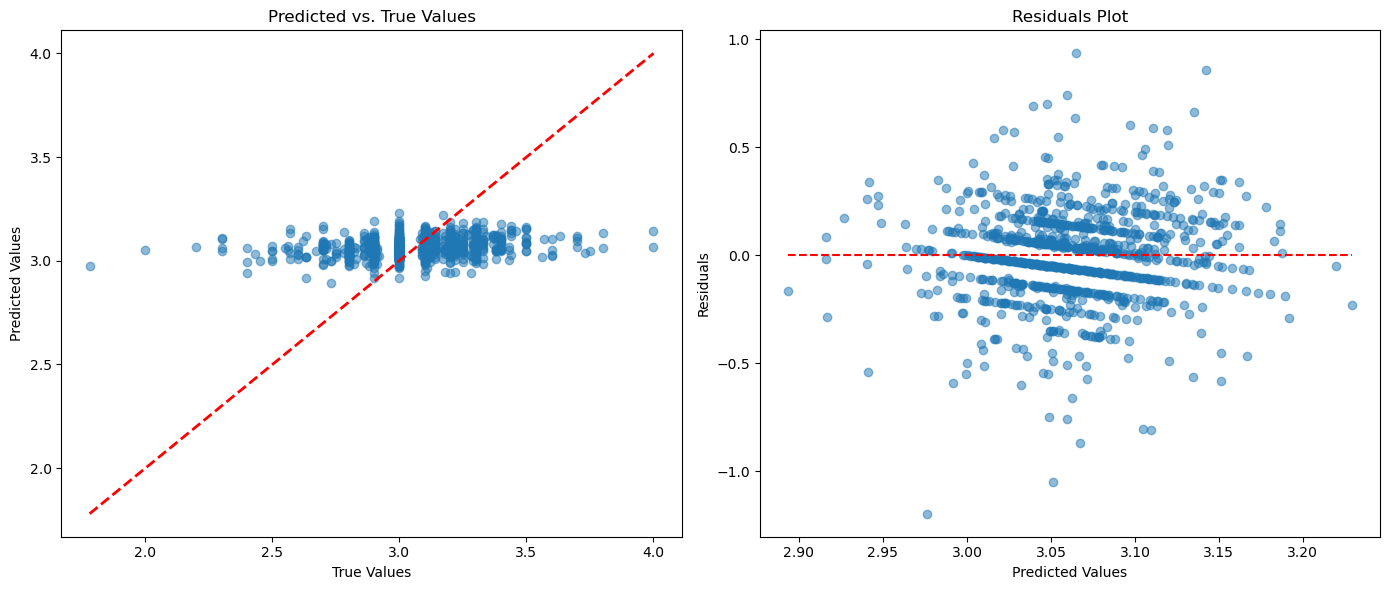

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Predicted vs. Real Values Plot
axs[0].scatter(y_test, y_pred_test_D, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Predicted vs. True Values')

# Residuals Plot
residuals = y_test - y_pred_test_D
axs[1].scatter(y_pred_test_D, residuals, alpha=0.5)
axs[1].hlines(0, xmin=min(y_pred_test_D), xmax=max(y_pred_test_D), colors='r', linestyles='--')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()
